A. importing the libraries

In [2]:
import numpy as np 
import pandas as pd

B. load the data 

In [3]:
df = pd.read_csv('.//used_cars.csv')
df.head()



,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.describe

<bound method NDFrame.describe of          brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                             e

1. first handling missing values

In [5]:
print(df.isnull().sum())

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


In [6]:
df = df.drop_duplicates(subset=['milage', 'engine'])

In [7]:
print(df.isnull().sum())

brand             0
model             0
model_year        0
milage            0
fuel_type       168
engine            0
transmission      0
ext_col           0
int_col           0
accident        112
clean_title     595
price             0
dtype: int64


In [8]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


2. milage has .mi that should be removed

In [9]:
df['milage'] = df['milage'].str.replace(',', '').str.replace(' mi.', '')

df['milage'] = pd.to_numeric(df['milage'])

C:\Users\acer\AppData\Local\Temp\ipykernel_14232\3695423957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['milage'] = df['milage'].str.replace(',', '').str.replace(' mi.', '')
C:\Users\acer\AppData\Local\Temp\ipykernel_14232\3695423957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['milage'] = pd.to_numeric(df['milage'])


In [10]:
df['milage'].info

<bound method Series.info of 0       51000
1       34742
2       22372
3       88900
4        9835
        ...  
4004      714
4005    10900
4006     2116
4007    33000
4008    43000
Name: milage, Length: 3995, dtype: int64>

3. i split the engine column into horsepower and engine_displacement columns

In [11]:
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)

df['engine_displacement'] = df['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)

df = df.drop(columns=['engine'])


C:\Users\acer\AppData\Local\Temp\ipykernel_14232\3345712922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)
C:\Users\acer\AppData\Local\Temp\ipykernel_14232\3345712922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_displacement'] = df['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)


In [12]:
df['horsepower'].info

<bound method Series.info of 0       300.0
1         NaN
2         NaN
3       354.0
4         NaN
        ...  
4004      NaN
4005    349.0
4006      NaN
4007    450.0
4008    248.0
Name: horsepower, Length: 3995, dtype: float64>

In [13]:
df['engine_displacement'].info

<bound method Series.info of 0       3.7
1       3.8
2       NaN
3       3.5
4       2.0
       ... 
4004    6.0
4005    3.0
4006    NaN
4007    3.5
4008    2.0
Name: engine_displacement, Length: 3995, dtype: float64>

4. get rid of the & in prices

In [14]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')

df['price'] = pd.to_numeric(df['price'])

In [15]:
df['price'].info

<bound method Series.info of 0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 3995, dtype: int64>

In [16]:
df['accident'] = df['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)

# Verify the encoding
print(df['accident'].value_counts())

accident
0    3014
1     981
Name: count, dtype: int64


In [17]:
df['accident'].info

<bound method Series.info of 0       1
1       1
2       0
3       0
4       0
       ..
4004    0
4005    0
4006    0
4007    0
4008    1
Name: accident, Length: 3995, dtype: int64>

In [18]:
print(df.isnull().sum())

brand                    0
model                    0
model_year               0
milage                   0
fuel_type              168
transmission             0
ext_col                  0
int_col                  0
accident                 0
clean_title            595
price                    0
horsepower             807
engine_displacement    374
dtype: int64


In [19]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,1,Yes,10300,300.0,3.7
1,Hyundai,Palisade SEL,2021,34742,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,1,Yes,38005,NaN,3.8
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,0,NaN,54598,NaN,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,0,Yes,15500,354.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,0,NaN,34999,NaN,2.0


In [20]:
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['engine_displacement'].fillna(df['engine_displacement'].median(), inplace=True)


C:\Users\acer\AppData\Local\Temp\ipykernel_14232\2849790425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_14232\2849790425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [21]:
print(df.isnull().sum())

brand                    0
model                    0
model_year               0
milage                   0
fuel_type              168
transmission             0
ext_col                  0
int_col                  0
accident                 0
clean_title            595
price                    0
horsepower               0
engine_displacement      0
dtype: int64


In [22]:
df['clean_title'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else -1)


In [23]:
df['clean_title'].info

<bound method Series.info of 0       1
1       1
2      -1
3       1
4      -1
       ..
4004    1
4005    1
4006   -1
4007    1
4008    1
Name: clean_title, Length: 3995, dtype: int64>

In [24]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,1,1,10300,300.0,3.7
1,Hyundai,Palisade SEL,2021,34742,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,1,1,38005,310.0,3.8
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,0,-1,54598,310.0,3.5
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,0,1,15500,354.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,0,-1,34999,310.0,2.0


In [25]:
df['fuel_type'].fillna('Gasoline', inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_14232\1120006450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna('Gasoline', inplace=True)


In [26]:
print(df.isnull().sum())

brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
transmission           0
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
horsepower             0
engine_displacement    0
dtype: int64


In [27]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,1,1,10300,300.0,3.7
1,Hyundai,Palisade SEL,2021,34742,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,1,1,38005,310.0,3.8
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,0,-1,54598,310.0,3.5
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,0,1,15500,354.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,0,-1,34999,310.0,2.0


now encode the categorical vars

In [28]:
df = pd.get_dummies(df, columns=['brand', 'model', 'transmission', 'ext_col', 'int_col', 'fuel_type'], drop_first=True)


scale the num data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['milage', 'price', 'horsepower', 'engine_displacement']] = scaler.fit_transform(df[['milage', 'price', 'horsepower', 'engine_displacement']])

In [31]:
df.head()

,model_year,milage,accident,clean_title,price,horsepower,engine_displacement,brand_Alfa,brand_Aston,brand_Audi,...,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–
0,2013,-0.261992,1,1,-0.434490,-0.250596,0.009752,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2021,-0.572753,1,1,-0.082979,-0.158880,0.083605,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2022,-0.809197,0,-1,0.127547,-0.158880,-0.137955,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,2015,0.462440,0,1,-0.368514,0.244668,-0.137955,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2021,-1.048833,0,-1,-0.121118,-0.158880,-1.245758,False,False,True,...,False,False,False,False,False,True,False,False,False,False


D. visualize the data

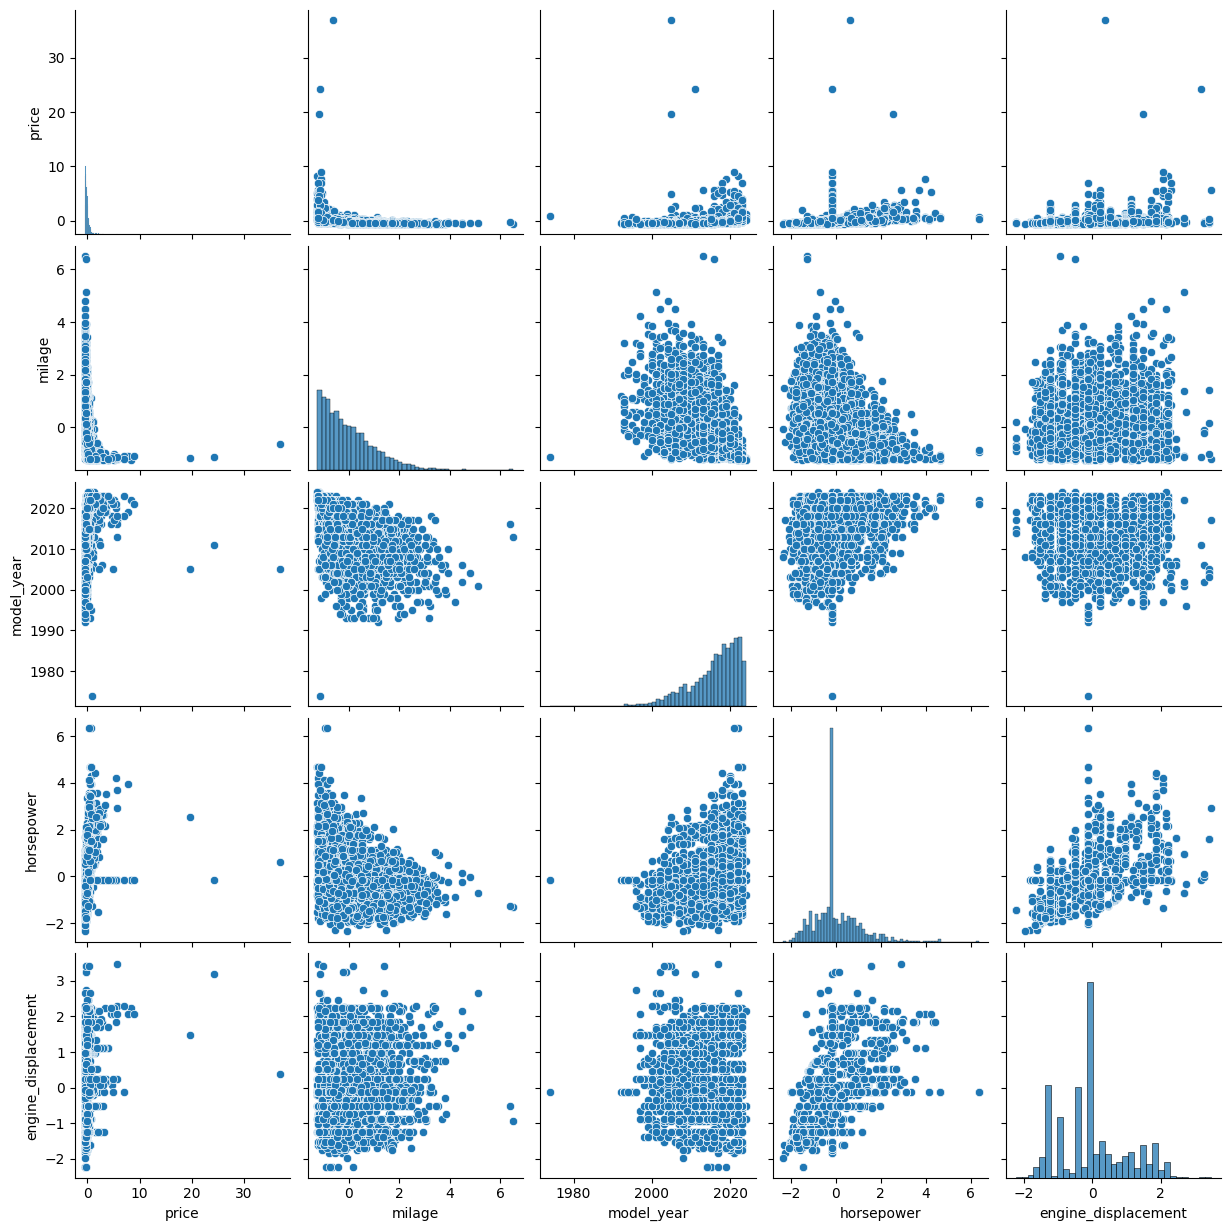

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[['price', 'milage', 'model_year', 'horsepower','engine_displacement']])
plt.show()

E. split the data into X features and y target

In [33]:
X = df.drop(columns=["price"])
y = df["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

F. build and evaluate the module

In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# forst i will initialize the module
svr = SVR()

#next train it
svr.fit(X_train, y_train)

# i got ValueError: could not convert string to float: 'At least 1 accident or damage reported'
# so i return to the preprocessing code and print the first 5 columns and notices 
# that accident has text data so i tried fixed it 


SVR()

G. make  predictions

In [35]:
y_pred = svr.predict(X_test)


H. evaluate the module

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

MAE: 0.345983220937144
MSE: 1.3992906459693923
R²: -0.01850214795519145


pretty bad results :(

I. hyperparametera tuning with GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],  # Remove 1000 for now to reduce search space
    'gamma': ['scale', 'auto', 0.01, 0.1],  # Smaller gamma range
    'epsilon': [0.01, 0.1, 0.2]
}



In [59]:

grid_search = GridSearchCV(SVR(), param_grid, cv=3,scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

 

Fitting 3 folds for each of 48 candidates, totalling 144 fits


KeyboardInterrupt: 

In [ ]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'C': 1000, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: -0.03981318534175804


In [ ]:
best_svr = grid_search.best_estimator_
best_svr.fit(X_train, y_train)

SVR(C=1000, gamma='auto')

In [ ]:
y_pred_best = best_svr.predict(X_test)

In [ ]:
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [ ]:

print(f'Best Model Mean Absolute Error: {mae_best}')
print(f'Best Model R-squared: {r2_best}')

Best Model Mean Absolute Error: 20972.052139581516
Best Model R-squared: -0.025850643102438342


the model's permormance is not good and idicates that it's not capturing underlying patterns effectively
as the r2 is low that means that the model explains very little of the varience in teh target var
and the high mae means the prediction is way far from the actual prices